## Research of possibility to apply cofi for 2 layers
e.g. books and movies


This file has errors 
- Normalize_Y-3D should not consider Ymean for every Y 
- J_derivative  should consider only R ==1 

See `cofi_3d_demo` fixed version

    
    

## Read the ratings 

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('ratings_movies.xlsx', header=None)
df.columns = [f'u{i}' for i in range(len(list(df)))]
df

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13,u14
0,5,5,5,1,1,1,1,1,1,5,5,5,2,2,2
1,5,5,5,1,1,1,1,1,1,5,5,5,2,2,2
2,5,5,5,1,1,1,1,1,1,5,5,5,2,2,2
3,3,3,3,5,5,5,1,1,1,5,5,5,1,1,1
4,3,3,3,5,5,5,1,1,1,5,5,5,1,1,1
5,3,3,3,5,5,5,1,1,1,5,5,5,1,1,1
6,1,1,1,3,3,3,5,5,5,5,5,5,1,1,1
7,1,1,1,3,3,3,5,5,5,5,5,5,1,1,1
8,1,1,1,3,3,3,5,5,5,5,5,5,1,1,1
9,4,4,4,4,4,4,2,2,2,4,4,4,1,1,1


In [5]:
#  Remove one user to distinguish axis 
del df['u14']
df

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,5,5,5,1,1,1,1,1,1,5,5,5,2,2
1,5,5,5,1,1,1,1,1,1,5,5,5,2,2
2,5,5,5,1,1,1,1,1,1,5,5,5,2,2
3,3,3,3,5,5,5,1,1,1,5,5,5,1,1
4,3,3,3,5,5,5,1,1,1,5,5,5,1,1
5,3,3,3,5,5,5,1,1,1,5,5,5,1,1
6,1,1,1,3,3,3,5,5,5,5,5,5,1,1
7,1,1,1,3,3,3,5,5,5,5,5,5,1,1
8,1,1,1,3,3,3,5,5,5,5,5,5,1,1
9,4,4,4,4,4,4,2,2,2,4,4,4,1,1


## Remove part of data 

In [84]:
nm, nu = df.shape
nm, nu

(15, 14)

In [208]:
p_drop = 0.4
n_drop= int (nm*p_drop)
np.random.seed(2020)
# drop_matr = np.random.randint(0, nm, size= (n_drop,nu))
# np.random.choice(3, 3, replace=False)
# drop_matr

In [209]:

df_drop= df.copy()
for iu in range(nu): 
    drop_indices= sorted(np.random.choice(nm, n_drop, replace=False))
    print (drop_indices)
    for di in drop_indices:        
        df_drop.iloc[di, iu] = 0 
df_drop        

[1, 2, 4, 9, 11, 13]
[1, 8, 9, 10, 12, 13]
[0, 2, 3, 4, 7, 14]
[5, 6, 8, 11, 12, 13]
[1, 4, 7, 10, 12, 13]
[0, 2, 3, 4, 13, 14]
[4, 6, 9, 11, 13, 14]
[0, 1, 7, 9, 10, 11]
[4, 5, 9, 12, 13, 14]
[1, 4, 10, 12, 13, 14]
[2, 6, 8, 10, 11, 14]
[3, 5, 9, 10, 13, 14]
[0, 6, 9, 11, 13, 14]
[0, 1, 4, 8, 10, 14]


,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,5,5,0,1,1,0,1,0,1,5,5,5,0,0
1,0,0,5,1,0,1,1,0,1,0,5,5,2,0
2,0,5,0,1,1,0,1,1,1,5,0,5,2,2
3,3,3,0,5,5,0,1,1,1,5,5,0,1,1
4,0,3,0,5,0,0,0,1,0,0,5,5,1,0
5,3,3,3,0,5,5,1,1,0,5,5,0,1,1
6,1,1,1,0,3,3,0,5,5,5,0,5,0,1
7,1,1,0,3,0,3,5,0,5,5,5,5,1,1
8,1,0,1,0,3,3,5,5,5,5,0,5,1,0
9,0,0,4,4,4,4,0,0,0,4,4,0,0,1


In [250]:

df_target = df_drop
Y= df_target.copy().values
Y

array([[5, 5, 0, 1, 1, 0, 1, 0, 1, 5, 5, 5, 0, 0],
       [0, 0, 5, 1, 0, 1, 1, 0, 1, 0, 5, 5, 2, 0],
       [0, 5, 0, 1, 1, 0, 1, 1, 1, 5, 0, 5, 2, 2],
       [3, 3, 0, 5, 5, 0, 1, 1, 1, 5, 5, 0, 1, 1],
       [0, 3, 0, 5, 0, 0, 0, 1, 0, 0, 5, 5, 1, 0],
       [3, 3, 3, 0, 5, 5, 1, 1, 0, 5, 5, 0, 1, 1],
       [1, 1, 1, 0, 3, 3, 0, 5, 5, 5, 0, 5, 0, 1],
       [1, 1, 0, 3, 0, 3, 5, 0, 5, 5, 5, 5, 1, 1],
       [1, 0, 1, 0, 3, 3, 5, 5, 5, 5, 0, 5, 1, 0],
       [0, 0, 4, 4, 4, 4, 0, 0, 0, 4, 4, 0, 0, 1],
       [4, 0, 4, 4, 0, 4, 2, 0, 2, 0, 0, 0, 1, 0],
       [0, 4, 4, 0, 4, 4, 0, 0, 2, 4, 0, 4, 0, 1],
       [1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [251]:
# keep info about provided values in separate matrix R to let manipulate with Y 
R= df_target.applymap(lambda x: int(bool(x))).values
R  

array([[1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0],
       [0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
       [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0],
       [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
       [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1],
       [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [252]:
def J(Y, R, X, Theta, lambd):
    '''    
    Y - matrix of ratings , shape = (num_movies, num_users)
    R - similar as Y but 1 marked values 0 marks missed values (Y== 0 )  shape = (num_movies, num_users)
    X - params of movies, shape = (num_movies, num_features)
    Theta  - params of users. shape = (num_features, num_users)
    lambda - regularization param 
    :return expression for cost function
    '''
    assert (X.shape[1] == Theta.shape[0])
    h = X @ Theta

    try:
        assert (h.shape == Y.shape)
    except:
        print('h.shape {} !=Y.shape {}'.format(h.shape, Y.shape))

    J = 1 / 2 * np.sum(((h - Y) * R) ** 2) + lambd / 2 * np.sum(X ** 2) + lambd / 2 * np.sum(Theta ** 2)
    
    try:
        assert (len(J.shape) == 0)
    except:
        print('J is not raw number. J.shape = ', J.shape)

    return J

def J_derivative(Y, R, X, Theta, num_movies, num_users, num_features, lambd):
    cost_matr = (X @ Theta - Y) * R  # n_movies * n_users

    X_grad = cost_matr @ Theta.T
    Theta_grad = (cost_matr.T @ X).T

    try:
        assert (X_grad.shape == X.shape)
        assert (Theta_grad.shape == Theta.shape)
    except:
        print('Check gradient calculus')

    # Regularization part :
    X_grad += lambd * X
    Theta_grad += lambd * Theta

    return X_grad, Theta_grad

def fit(Y, R, num_features=10, alpha=0.0001, lambd=.01, eps=.1, max_iter=1000, step=100, verbose=0):
    assert isinstance(Y, np.ndarray)
    assert isinstance(R, np.ndarray)
    num_movies, num_users = Y.shape

    if verbose:
        print (f'num_movies= {num_movies}, num_users= {num_users}')
        print('Running gradient descent with alpha= {}, lambda= {}, eps= {}, max_iter= {}'.format(
            alpha, lambd, eps, max_iter))

    #     X= params[:num_movies*num_features].reshape(num_movies,num_features)
    #     Theta = params[num_movies*num_features:].reshape(num_features,num_users)

    np.random.seed(2019)
    X = np.random.randn(num_movies, num_features)
    Theta = np.random.randn(num_features, num_users)

    J_hist = [-1]  # used for keeping J values. Init with -1 to avoid 0 at first iter
    continue_iter = True  # flag to continue next iter (grad desc step)
    iter_number = 0  # used for limit by max_iter

    try:
        while continue_iter:
            # Do step of gradient descent
            X_grad, Theta_grad = J_derivative(Y, R, X, Theta, num_movies, num_users, num_features, lambd)
            X = X - alpha * X_grad
            Theta = Theta - alpha * Theta_grad

            # keep history of J values
            J_hist.append(J(Y, R, X, Theta, lambd))
            # check criteria of exit (finish grad desc)
            if iter_number > max_iter:  # if limit succeeded
                continue_iter = False
                print('iter_number> max_iter')
            elif np.abs(J_hist[iter_number - 1] - J_hist[iter_number]) < eps:  # if accuracy is succeeded
                continue_iter = False
                print('J_hist[{}]={}, previous= {}, eps = {}'.format(iter_number,J_hist[iter_number], J_hist[iter_number - 1], eps))
            iter_number += 1

            if verbose and iter_number % step == 0:
                print('{}: {}'.format(iter_number, J_hist[iter_number - 1]))
        return X, Theta, J_hist
    except Exception as e:
        print('Training is interrupted due to error:', e)
        return X, Theta, J_hist

In [25]:
%matplotlib inline 
import matplotlib.pyplot as plt
def draw_cost_changes(J_hist):
    J_hist=J_hist[1:]
    plt.figure()
    plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')


num_movies= 15, num_users= 14
Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.0001, max_iter= 10000
50: 579.1076714781553
100: 322.0551908047586
150: 258.72668520990425
200: 233.7785387678875
250: 219.23069168172688
300: 208.617921126657
350: 199.88122994556858
400: 192.20869444961903
450: 185.23662234305635
500: 178.78539136474075
550: 172.75754823330658
600: 167.09479413987793
650: 161.758628073922
700: 156.72116166836886
750: 151.9605492687724
800: 147.45861282402458
850: 143.19955565602848
900: 139.16923758895837
950: 135.35474978302278
1000: 131.74415479067932
1050: 128.32632045034813
1100: 125.09080860077147
1150: 122.02779671515154
1200: 119.12801985777674
1250: 116.38272555120913
1300: 113.7836370990853
1350: 111.32292263169555
1400: 108.99316816422738
1450: 106.78735357615048
1500: 104.6988308009121
1550: 102.72130375331184
1600: 100.84880967337067
1650: 99.07570166330383
1700: 97.396632258323
1750: 95.8065379146545
1800: 94.30062432695921
1850: 92.8743525070546

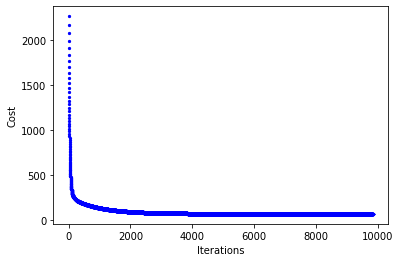

In [254]:
n_features= 20 
max_iter= 10000 
verbose= 1
lr = 0.0005
X, Theta, J_hist = fit(Y, R, num_features=n_features, alpha=lr, lambd=1, max_iter=max_iter,
                           eps=.0001, step=50, verbose=verbose)
draw_cost_changes(J_hist)   

In [255]:
pred = X @ Theta
df_pred= pd.DataFrame(pred, index= df_target.index, columns = df_target.columns)
df_pred

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,4.458499,4.775312,4.125394,1.215309,1.230427,1.953370,1.010450,0.928210,1.029243,4.792162,4.775822,4.884950,1.842836,1.784177
1,3.576627,4.125747,4.465975,1.189945,1.264739,1.368300,1.064658,0.849949,1.039224,4.158211,4.625505,4.704325,1.800170,1.592099
2,4.031324,4.538793,3.943113,1.135571,1.221735,1.805225,1.042201,1.052756,1.082254,4.633275,4.574184,4.762276,1.842876,1.780786
3,3.016267,3.045156,3.526407,4.697669,4.598850,4.285082,1.104936,0.917070,1.374592,4.695947,4.793760,4.281847,0.958034,0.972270
4,2.985409,2.982601,3.503575,4.416324,4.095620,3.831523,1.558002,1.224228,1.710849,4.758912,4.913205,4.610349,0.999270,1.001386
5,2.979796,3.041455,3.211623,4.497535,4.664210,4.563026,1.257865,1.159327,1.677772,4.743427,4.708121,4.144216,0.929136,0.953696
6,1.055170,1.089189,1.128223,2.661296,2.941979,2.950433,4.461947,4.521659,4.671701,4.804736,4.241346,4.741684,0.968931,1.035606
7,1.166116,1.167500,1.623714,2.971388,3.142822,3.004310,4.530510,4.324094,4.668179,4.876618,4.606874,4.965971,0.995000,1.008134
8,1.063036,1.080243,1.146596,2.661666,2.918281,2.952375,4.637915,4.640448,4.808404,4.848740,4.286267,4.805317,0.985749,1.066041
9,2.752910,2.863728,3.535109,3.807347,3.858484,3.716311,1.147917,0.914144,1.408798,3.941694,4.128681,3.700602,0.953010,0.975923


In [256]:
import math
# df_pred.applymap(lambda x: '{:.1f}'.format(x))
df_pred= df_pred.applymap(math.ceil)
df_pred

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,5,5,5,2,2,2,2,1,2,5,5,5,2,2
1,4,5,5,2,2,2,2,1,2,5,5,5,2,2
2,5,5,4,2,2,2,2,2,2,5,5,5,2,2
3,4,4,4,5,5,5,2,1,2,5,5,5,1,1
4,3,3,4,5,5,4,2,2,2,5,5,5,1,2
5,3,4,4,5,5,5,2,2,2,5,5,5,1,1
6,2,2,2,3,3,3,5,5,5,5,5,5,1,2
7,2,2,2,3,4,4,5,5,5,5,5,5,1,2
8,2,2,2,3,3,3,5,5,5,5,5,5,1,2
9,3,3,4,4,4,4,2,1,2,4,5,4,1,1


## Compare with original set 

In [31]:
def evaluate(df, df_pred):
    print ((np.sum((df-df_pred).values**2))/df.size)
    return df-df_pred
evaluate(df, df_pred)

3.6142857142857143


,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,2,2,4,-2,-1,-1,-1,-1,0,0,0,3,0,2
1,6,4,3,0,0,-1,0,2,0,3,2,2,1,1
2,6,3,4,0,0,0,0,1,0,1,3,1,1,1
3,0,-1,2,2,1,4,0,0,-1,0,2,4,0,0
4,4,2,2,3,5,3,-1,2,1,3,2,1,-1,0
5,0,0,1,3,1,1,-1,0,-1,1,2,3,2,0
6,0,-1,-1,2,0,0,4,5,4,3,5,3,2,0
7,1,-2,0,0,1,1,3,5,2,1,1,0,0,0
8,0,-1,-1,1,0,1,3,4,3,1,2,2,1,1
9,2,1,1,2,1,0,0,1,1,0,0,1,1,0


In [258]:
from sklearn.metrics import mean_squared_error as mse 
mse (df, df_pred)

0.3428571428571429

## Apply normaliziing 

In [268]:
Y

array([[5, 5, 0, 1, 1, 0, 1, 0, 1, 5, 5, 5, 0, 0],
       [0, 0, 5, 1, 0, 1, 1, 0, 1, 0, 5, 5, 2, 0],
       [0, 5, 0, 1, 1, 0, 1, 1, 1, 5, 0, 5, 2, 2],
       [3, 3, 0, 5, 5, 0, 1, 1, 1, 5, 5, 0, 1, 1],
       [0, 3, 0, 5, 0, 0, 0, 1, 0, 0, 5, 5, 1, 0],
       [3, 3, 3, 0, 5, 5, 1, 1, 0, 5, 5, 0, 1, 1],
       [1, 1, 1, 0, 3, 3, 0, 5, 5, 5, 0, 5, 0, 1],
       [1, 1, 0, 3, 0, 3, 5, 0, 5, 5, 5, 5, 1, 1],
       [1, 0, 1, 0, 3, 3, 5, 5, 5, 5, 0, 5, 1, 0],
       [0, 0, 4, 4, 4, 4, 0, 0, 0, 4, 4, 0, 0, 1],
       [4, 0, 4, 4, 0, 4, 2, 0, 2, 0, 0, 0, 1, 0],
       [0, 4, 4, 0, 4, 4, 0, 0, 2, 4, 0, 4, 0, 1],
       [1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [290]:
def normalize_Y(Y,R,scale_coef = 10 ):
    '''
    normalize along axis 1 - separately for every moview 
    '''
    assert isinstance(Y, np.ndarray) # make sure its np array - wrong results for pd.DataFrame
    assert isinstance(R, np.ndarray)
    scale = Y[R == 1].max() - Y[R == 1].min()
    assert (len(scale.shape) == 0) # make sure it is raw number 
    Y_scaled = Y / scale * scale_coef # make it more contrast
#     Ymean, Ynorm = normalize_Y(Y_scaled, R)
    n_0 = Y.shape[0]
    Ymean = np.zeros((n_0, 1))
    Ynorm = np.zeros(Y.shape)
    for i in range(n_0):
        idx = R[i,:] == 1
        Ymean[i] = Y_scaled[i, idx].mean()
        Ynorm[i, idx]= Y_scaled[i, idx] - Ymean[i]
    return Ymean, Ynorm, scale

scale_coef = 10
Ymean, Ynorm, scale = normalize_Y(Y, R, scale_coef = scale_coef)


In [291]:
scale

4

In [293]:
Ymean

array([[8.05555556],
       [6.5625    ],
       [6.        ],
       [7.04545455],
       [8.33333333],
       [7.5       ],
       [7.5       ],
       [7.95454545],
       [8.5       ],
       [8.92857143],
       [7.5       ],
       [8.4375    ],
       [2.5       ],
       [2.5       ],
       [2.5       ]])

num_movies= 15, num_users= 14
Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.0001, max_iter= 10000
50: 666.4490712709326
100: 366.9636736798785
150: 285.90469373886447
200: 255.38346388802682
250: 239.49168620244683
300: 228.80483306145385
350: 220.3716993947453
400: 213.1088275964159
450: 206.56595907365056
500: 200.53596852187215
550: 194.9137786577283
600: 189.64013760454182
650: 184.67761197940627
700: 179.99977844956868
750: 175.58613494574877
800: 171.41960422345142
850: 167.48525870193683
900: 163.7696412897754
950: 160.26038687662046
1000: 156.94600044937818
1050: 153.81571941912102
1100: 150.85942269411353
1150: 148.06756657674504
1200: 145.43113660712004
1250: 142.94160926015576
1300: 140.59091999561065
1350: 138.3714355983082
1400: 136.27592956112335
1450: 134.29755973558633
1500: 132.42984775429392
1550: 130.66665989793546
1600: 129.00218918362296
1650: 127.43093851653279
1700: 125.94770478881642
1750: 124.54756383727047
1800: 123.22585618975063
1850: 121.97

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,5,5,5,1,1,2,1,2,1,5,5,5,3,3
1,4,4,5,1,1,1,1,1,1,5,5,5,2,2
2,3,5,4,1,1,1,1,1,1,5,4,5,2,2
3,3,3,3,5,5,4,1,1,1,5,5,4,1,1
4,4,3,4,5,5,5,2,1,2,5,5,5,1,2
5,3,3,3,5,5,5,1,1,1,5,5,4,1,1
6,1,1,1,3,3,3,5,5,5,5,4,5,1,1
7,1,1,1,3,3,3,5,5,5,5,5,5,1,1
8,1,2,1,3,3,3,5,5,5,5,5,5,1,2
9,4,4,4,4,4,4,3,3,3,4,4,4,3,1


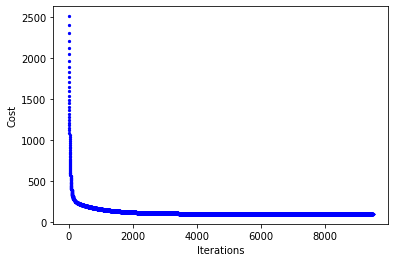

In [295]:
# fit mormalized 
X, Theta, J_hist = fit(Ynorm, R, num_features=n_features, alpha=lr, lambd=1, max_iter=max_iter,
                           eps=.0001, step=50, verbose=verbose)

draw_cost_changes(J_hist) 
pred = X @ Theta
pred_rescaled = (pred + Ymean) * scale / scale_coef
df_pred= pd.DataFrame(pred_rescaled, index= df_target.index, columns = df_target.columns)
df_pred= df_pred.applymap(round)
df_pred


In [298]:
evaluate(df, df_pred)

0.18095238095238095


,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,0,0,0,0,0,-1,0,-1,0,0,0,0,-1,-1
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,-1,0,-1,0,0,0,-1,0,-1,0,0,0,0,-1
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,-1,0,0,0,0,0,0,0,0,0,0,0,-1
9,0,0,0,0,0,0,-1,-1,-1,0,0,0,-2,0


## All together 



num_movies= 15, num_users= 14
Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.0001, max_iter= 10000
50: 666.4490712709326
100: 366.9636736798785
150: 285.90469373886447
200: 255.38346388802682
250: 239.49168620244683
300: 228.80483306145385
350: 220.3716993947453
400: 213.1088275964159
450: 206.56595907365056
500: 200.53596852187215
550: 194.9137786577283
600: 189.64013760454182
650: 184.67761197940627
700: 179.99977844956868
750: 175.58613494574877
800: 171.41960422345142
850: 167.48525870193683
900: 163.7696412897754
950: 160.26038687662046
1000: 156.94600044937818
1050: 153.81571941912102
1100: 150.85942269411353
1150: 148.06756657674504
1200: 145.43113660712004
1250: 142.94160926015576
1300: 140.59091999561065
1350: 138.3714355983082
1400: 136.27592956112335
1450: 134.29755973558633
1500: 132.42984775429392
1550: 130.66665989793546
1600: 129.00218918362296
1650: 127.43093851653279
1700: 125.94770478881642
1750: 124.54756383727047
1800: 123.22585618975063
1850: 121.97

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,5,5,5,1,1,2,1,2,1,5,5,5,3,3
1,4,4,5,1,1,1,1,1,1,5,5,5,2,2
2,3,5,4,1,1,1,1,1,1,5,4,5,2,2
3,3,3,3,5,5,4,1,1,1,5,5,4,1,1
4,4,3,4,5,5,5,2,1,2,5,5,5,1,2
5,3,3,3,5,5,5,1,1,1,5,5,4,1,1
6,1,1,1,3,3,3,5,5,5,5,4,5,1,1
7,1,1,1,3,3,3,5,5,5,5,5,5,1,1
8,1,2,1,3,3,3,5,5,5,5,5,5,1,2
9,4,4,4,4,4,4,3,3,3,4,4,4,3,1


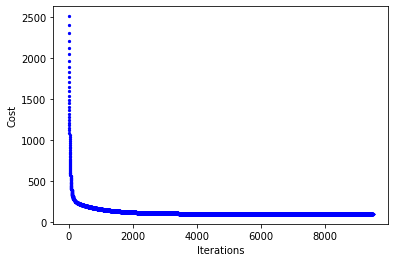

In [310]:
def fill_matrix(df_target, n_features=20, max_iter= 10000, verbose= 1, lr = 0.0005,eps= .0001, step_display=50 ):
    nm, nu = df.shape 
    Y= df_target.copy().values
    R= df_target.applymap(lambda x: int(bool(x))).values

    Ymean, Ynorm, scale = normalize_Y(Y, R)
    X, Theta, J_hist = fit(Ynorm, R, num_features=n_features, alpha=lr, lambd=1, max_iter=max_iter,
                           eps=eps, step=step_display, verbose=verbose)

    draw_cost_changes(J_hist) 
    pred = X @ Theta
    pred_rescaled = (pred + Ymean) * scale / scale_coef
    df_pred= pd.DataFrame(pred_rescaled, index= df_target.index, columns = df_target.columns)
    df_pred= df_pred.applymap(round)
    return df_pred

n_features=20
max_iter= 10000 
verbose= 1
lr = 0.0005
eps= .0001 

df_pred = fill_matrix(df_target, 
            n_features= n_features, 
            max_iter= max_iter,
            verbose= verbose,
            lr =lr,
            eps= eps,
            step_display=50 )
df_pred

In [312]:
diff = evaluate(df, df_pred)
diff 

0.18095238095238095


,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,0,0,0,0,0,-1,0,-1,0,0,0,0,-1,-1
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,-1,0,-1,0,0,0,-1,0,-1,0,0,0,0,-1
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,-1,0,0,0,0,0,0,0,0,0,0,0,-1
9,0,0,0,0,0,0,-1,-1,-1,0,0,0,-2,0


#  ============= Add Layer ==================

In [6]:
df

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,5,5,5,1,1,1,1,1,1,5,5,5,2,2
1,5,5,5,1,1,1,1,1,1,5,5,5,2,2
2,5,5,5,1,1,1,1,1,1,5,5,5,2,2
3,3,3,3,5,5,5,1,1,1,5,5,5,1,1
4,3,3,3,5,5,5,1,1,1,5,5,5,1,1
5,3,3,3,5,5,5,1,1,1,5,5,5,1,1
6,1,1,1,3,3,3,5,5,5,5,5,5,1,1
7,1,1,1,3,3,3,5,5,5,5,5,5,1,1
8,1,1,1,3,3,3,5,5,5,5,5,5,1,1
9,4,4,4,4,4,4,2,2,2,4,4,4,1,1


In [7]:
coef_layer = np.random.randint(30, 50, size= df.shape)/10
coef_layer

array([[4.1, 3.8, 4. , 4.8, 4.1, 3.9, 4.7, 4.8, 3.5, 3.3, 3.9, 4.4, 4.6,
        3.8],
       [4.2, 4.1, 4.8, 4. , 3.8, 4.6, 4.2, 4.4, 3.6, 4.1, 3.6, 4.3, 3.5,
        3. ],
       [3.3, 4.8, 4. , 3.7, 3.2, 3.7, 3.7, 3.2, 4.5, 4.6, 3.4, 3.7, 3.1,
        3.7],
       [4.1, 4.9, 4.4, 3.3, 3.5, 4.6, 4.2, 4.8, 4.4, 4.2, 4.1, 3.4, 4.5,
        4.7],
       [3.6, 3.8, 4.1, 3.2, 4.3, 3.5, 4.1, 4.5, 3.8, 3.1, 3.9, 3.8, 4.9,
        3.8],
       [4.8, 4.6, 3.8, 3.9, 3.3, 4.3, 3. , 3.9, 4.6, 3.3, 4.7, 3.8, 3.1,
        3.3],
       [3.8, 4.1, 4.1, 3.1, 3.2, 3.5, 3.4, 3.4, 3.9, 3.6, 3.7, 3. , 3.4,
        3.8],
       [3.2, 3.8, 4.5, 3.6, 4.1, 4.8, 4.1, 3.2, 4.2, 4.8, 4.6, 3.6, 4.8,
        4. ],
       [3.2, 4.7, 3.3, 3.3, 4. , 3.3, 4.7, 3.2, 4.2, 3.4, 4.6, 4. , 4.7,
        3.3],
       [4.8, 3.5, 3.5, 3.8, 4.9, 4.9, 4.7, 3.1, 3.3, 3.8, 3.1, 3.8, 3.3,
        4.7],
       [3.2, 4.9, 4.8, 4.1, 4.6, 3.5, 4.7, 3.4, 4.4, 4.2, 4.7, 3.9, 4.4,
        3.4],
       [3.9, 4.4, 4.3, 3.3, 4.6, 4.4, 3.2, 

In [8]:
df_alt = df/coef_layer
df_alt

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,1.219512,1.315789,1.250000,0.208333,0.243902,0.256410,0.212766,0.208333,0.285714,1.515152,1.282051,1.136364,0.434783,0.526316
1,1.190476,1.219512,1.041667,0.250000,0.263158,0.217391,0.238095,0.227273,0.277778,1.219512,1.388889,1.162791,0.571429,0.666667
2,1.515152,1.041667,1.250000,0.270270,0.312500,0.270270,0.270270,0.312500,0.222222,1.086957,1.470588,1.351351,0.645161,0.540541
3,0.731707,0.612245,0.681818,1.515152,1.428571,1.086957,0.238095,0.208333,0.227273,1.190476,1.219512,1.470588,0.222222,0.212766
4,0.833333,0.789474,0.731707,1.562500,1.162791,1.428571,0.243902,0.222222,0.263158,1.612903,1.282051,1.315789,0.204082,0.263158
5,0.625000,0.652174,0.789474,1.282051,1.515152,1.162791,0.333333,0.256410,0.217391,1.515152,1.063830,1.315789,0.322581,0.303030
6,0.263158,0.243902,0.243902,0.967742,0.937500,0.857143,1.470588,1.470588,1.282051,1.388889,1.351351,1.666667,0.294118,0.263158
7,0.312500,0.263158,0.222222,0.833333,0.731707,0.625000,1.219512,1.562500,1.190476,1.041667,1.086957,1.388889,0.208333,0.250000
8,0.312500,0.212766,0.303030,0.909091,0.750000,0.909091,1.063830,1.562500,1.190476,1.470588,1.086957,1.250000,0.212766,0.303030
9,0.833333,1.142857,1.142857,1.052632,0.816327,0.816327,0.425532,0.645161,0.606061,1.052632,1.290323,1.052632,0.303030,0.212766


In [11]:
def refine_df(df, p_drop = 0.4, axis= 0, seed = 2020):
    '''assigns zero to  p_drop % amount of values for every column if axis=0 / row if axis=1  '''
    _, nu = df.shape
    n_drop= int (df.shape[axis]*p_drop)
    if seed:     
        np.random.seed(seed)
    df_drop= df.copy()
    for iu in range(nu): 
        drop_indices= sorted(np.random.choice(nm, n_drop, replace=False))    
        for di in drop_indices:        
            df_drop.iloc[di, iu] = 0 
    return df_drop        

df_drop_alt = refine_df(df_alt, seed = 14)
df_drop_alt

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,0.000000,1.315789,0.000000,0.208333,0.000000,0.256410,0.212766,0.208333,0.285714,1.515152,0.000000,0.000000,0.000000,0.526316
1,0.000000,0.000000,0.000000,0.250000,0.263158,0.217391,0.238095,0.000000,0.277778,1.219512,0.000000,0.000000,0.571429,0.000000
2,1.515152,1.041667,0.000000,0.270270,0.000000,0.270270,0.000000,0.000000,0.000000,1.086957,1.470588,1.351351,0.645161,0.000000
3,0.000000,0.000000,0.681818,0.000000,1.428571,0.000000,0.238095,0.208333,0.227273,0.000000,0.000000,1.470588,0.222222,0.000000
4,0.833333,0.789474,0.731707,1.562500,0.000000,1.428571,0.000000,0.222222,0.263158,0.000000,1.282051,1.315789,0.204082,0.263158
5,0.000000,0.652174,0.789474,1.282051,1.515152,1.162791,0.333333,0.256410,0.000000,1.515152,1.063830,1.315789,0.000000,0.303030
6,0.263158,0.243902,0.000000,0.967742,0.000000,0.000000,0.000000,1.470588,0.000000,0.000000,0.000000,0.000000,0.000000,0.263158
7,0.312500,0.263158,0.222222,0.000000,0.000000,0.000000,1.219512,0.000000,1.190476,0.000000,1.086957,0.000000,0.000000,0.250000
8,0.312500,0.000000,0.303030,0.000000,0.750000,0.000000,1.063830,1.562500,0.000000,1.470588,1.086957,1.250000,0.212766,0.303030
9,0.833333,1.142857,1.142857,1.052632,0.816327,0.816327,0.000000,0.645161,0.606061,1.052632,0.000000,1.052632,0.303030,0.000000


In [14]:
df_target= refine_df(df, seed = 2020)
df_target

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,5,5,0,1,1,0,1,0,1,5,5,5,0,0
1,0,0,5,1,0,1,1,0,1,0,5,5,2,0
2,0,5,0,1,1,0,1,1,1,5,0,5,2,2
3,3,3,0,5,5,0,1,1,1,5,5,0,1,1
4,0,3,0,5,0,0,0,1,0,0,5,5,1,0
5,3,3,3,0,5,5,1,1,0,5,5,0,1,1
6,1,1,1,0,3,3,0,5,5,5,0,5,0,1
7,1,1,0,3,0,3,5,0,5,5,5,5,1,1
8,1,0,1,0,3,3,5,5,5,5,0,5,1,0
9,0,0,4,4,4,4,0,0,0,4,4,0,0,1


In [15]:
nm, nu = df.shape 
nt= 2
Y_3d = np.zeros(shape= (nt, nm, nu ))
Y_3d[0,:,:] = df_target.copy().values
Y_3d[1,:,:] = df_drop_alt.copy().values
Y_3d
# Y= df_target.copy().values
# R= df_target.applymap(lambda x: int(bool(x))).values

# Ymean, Ynorm, scale = normalize_Y(Y, R)
# X, Theta, J_hist = fit(Ynorm, R, num_features=n_features, alpha=lr, lambd=1, max_iter=max_iter,
#                        eps=eps, step=step_display, verbose=verbose)

# draw_cost_changes(J_hist) 
# pred = X @ Theta
# pred_rescaled = (pred + Ymean) * scale / scale_coef
# df_pred= pd.DataFrame(pred_rescaled, index= df_target.index, columns = df_target.columns)
# df_pred= df_pred.applymap(round)
# return df_pred


array([[[5.        , 5.        , 0.        , 1.        , 1.        ,
         0.        , 1.        , 0.        , 1.        , 5.        ,
         5.        , 5.        , 0.        , 0.        ],
        [0.        , 0.        , 5.        , 1.        , 0.        ,
         1.        , 1.        , 0.        , 1.        , 0.        ,
         5.        , 5.        , 2.        , 0.        ],
        [0.        , 5.        , 0.        , 1.        , 1.        ,
         0.        , 1.        , 1.        , 1.        , 5.        ,
         0.        , 5.        , 2.        , 2.        ],
        [3.        , 3.        , 0.        , 5.        , 5.        ,
         0.        , 1.        , 1.        , 1.        , 5.        ,
         5.        , 0.        , 1.        , 1.        ],
        [0.        , 3.        , 0.        , 5.        , 0.        ,
         0.        , 0.        , 1.        , 0.        , 0.        ,
         5.        , 5.        , 1.        , 0.        ],
        [3.        ,

In [16]:
Y_3d[0,:,:]

array([[5., 5., 0., 1., 1., 0., 1., 0., 1., 5., 5., 5., 0., 0.],
       [0., 0., 5., 1., 0., 1., 1., 0., 1., 0., 5., 5., 2., 0.],
       [0., 5., 0., 1., 1., 0., 1., 1., 1., 5., 0., 5., 2., 2.],
       [3., 3., 0., 5., 5., 0., 1., 1., 1., 5., 5., 0., 1., 1.],
       [0., 3., 0., 5., 0., 0., 0., 1., 0., 0., 5., 5., 1., 0.],
       [3., 3., 3., 0., 5., 5., 1., 1., 0., 5., 5., 0., 1., 1.],
       [1., 1., 1., 0., 3., 3., 0., 5., 5., 5., 0., 5., 0., 1.],
       [1., 1., 0., 3., 0., 3., 5., 0., 5., 5., 5., 5., 1., 1.],
       [1., 0., 1., 0., 3., 3., 5., 5., 5., 5., 0., 5., 1., 0.],
       [0., 0., 4., 4., 4., 4., 0., 0., 0., 4., 4., 0., 0., 1.],
       [4., 0., 4., 4., 0., 4., 2., 0., 2., 0., 0., 0., 1., 0.],
       [0., 4., 4., 0., 4., 4., 0., 0., 2., 4., 0., 4., 0., 1.],
       [1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [17]:
Y_3d[1,:,:]

array([[0.        , 1.31578947, 0.        , 0.20833333, 0.        ,
        0.25641026, 0.21276596, 0.20833333, 0.28571429, 1.51515152,
        0.        , 0.        , 0.        , 0.52631579],
       [0.        , 0.        , 0.        , 0.25      , 0.26315789,
        0.2173913 , 0.23809524, 0.        , 0.27777778, 1.2195122 ,
        0.        , 0.        , 0.57142857, 0.        ],
       [1.51515152, 1.04166667, 0.        , 0.27027027, 0.        ,
        0.27027027, 0.        , 0.        , 0.        , 1.08695652,
        1.47058824, 1.35135135, 0.64516129, 0.        ],
       [0.        , 0.        , 0.68181818, 0.        , 1.42857143,
        0.        , 0.23809524, 0.20833333, 0.22727273, 0.        ,
        0.        , 1.47058824, 0.22222222, 0.        ],
       [0.83333333, 0.78947368, 0.73170732, 1.5625    , 0.        ,
        1.42857143, 0.        , 0.22222222, 0.26315789, 0.        ,
        1.28205128, 1.31578947, 0.20408163, 0.26315789],
       [0.        , 0.65217391, 0.7

In [19]:
# nm,nu,nt = Y_3d.shape
nm,nu,nt

(15, 14, 2)

In [215]:
def f(x):
    return int(bool(x))
vf = np.vectorize(f)


R_3d= vf(Y_3d)
R_3d

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1

In [21]:
def J_3d(Y, R, T, M, U, lambd):
    '''    
    Y - matrix of ratings , shape = (nt, nm, nu)
    R - similar as Y but 1 marked values 0 marks missed values (Y== 0 )  shape = (nt, nm, nu)
    T - params of Type , shape = (nt, nf)
    M - params of movies, shape = (nm, nf)
    U  - params of users. shape = shape = (nu, nf)
    lambda - regularization param 
    : return expression for cost function
    '''
    W = multiply_3d(T, M, U) 

    try:
        assert (W.shape == Y.shape)
    except:
        print('h.shape {} !=Y.shape {}'.format(W.shape, Y.shape))

    J = 1 / 2 * np.sum(((W - Y) * R) ** 2) + lambd / 2 * np.sum(T ** 2) +  lambd / 2 * np.sum(M ** 2) + lambd / 2 * np.sum(U ** 2)
    
    try:
        assert (len(J.shape) == 0)
    except:
        print('J is not raw number. J.shape = ', J.shape)

    return J

def J_derivative_3d(Y, R, T, M, U, nt, nm, nu, nf, lambd):
    assert len(Y.shape)==3
    T_grad = np.zeros(shape=T.shape)
    M_grad = np.zeros(shape=M.shape)
    U_grad = np.zeros(shape=U.shape)
    for t in range (nt):
        for g in range (nf):
            T_grad[t,g] = np.sum([(np.sum([ T[t,f] * M[m,f] * U[u,f] for f in range(nf)])- Y[t,m,u]) * M[m,g]* U[u,g]
                     for m in range(nm)  for u in range(nu) ])
    for m in range (nm):
        for g in range (nf):
            M_grad[m,g] = np.sum([(np.sum([ T[t,f] * M[m,f] * U[u,f] for f in range(nf)])- Y[t,m,u]) * T[t,g]* U[u,g]
                     for t in range(nt)  for u in range(nu) ])
    for u in range (nu):
        for g in range (nf):
            U_grad[u,g] = np.sum([(np.sum([ T[t,f] * M[m,f] * U[u,f] for f in range(nf)])- Y[t,m,u]) * T[t,g]* M[m,g]
                     for t in range(nt)  for m in range(nm) ])

    
    T_grad += lambd * T
    M_grad += lambd * M
    U_grad += lambd * U

    return T_grad, M_grad, U_grad

def multiply_3d(T, M, U): 
    nt, nm, nu, nf = T.shape[0], M.shape[0], U.shape[0], U.shape[1]
    assert (T.shape[1]== M.shape[1]== U.shape[1])
#     print ('nt={}, nm={}, nu={}, nf={}'.format(nt, nm, nu, nf))
    
    W = np.zeros(shape= (nt, nm, nu))
    for t in range (nt):
        for m in range (nm):
            for u in range (nu):
                W[t,m,u] = np.sum([ T[t,f] * M[m,f] * U[u,f]   for f in range(nf)])
    return W

def fit_3d(Y, R, nf=10, alpha=0.0001, lambd=.01, eps=.1, max_iter=1000, step=100, verbose=0):
    assert isinstance(Y, np.ndarray)
    assert len(Y.shape)==3
    assert isinstance(R, np.ndarray)
    assert len(R.shape)==3
    
    nt, nm, nu = Y.shape

    if verbose:
        print (f'num_types= {nt}, num_movies= {nm}, num_users= {nu}')
        print('Running gradient descent with alpha= {}, lambda= {}, eps= {}, max_iter= {}'.format(
            alpha, lambd, eps, max_iter))

    
    np.random.seed(2020)

    T = np.random.randn(nt, nf)
#     X = np.random.randn(num_movies, num_features)
    M = np.random.randn(nm, nf)
#     Theta = np.random.randn(num_features, num_users)
    U = np.random.randn(nu,nf)
    
    
    J_hist = [-1]  # used for keeping J values. Init with -1 to avoid 0 at first iter
    continue_iter = True  # flag to continue next iter (grad desc step)
    iter_number = 0  # used for limit by max_iter
    

    try:
        while continue_iter:
            # Do step of gradient descent
#             X_grad, Theta_grad = J_derivative(Y, R, X, Theta, num_movies, num_users, num_features, lambd)
            T_grad, M_grad, U_grad = J_derivative_3d(Y, R, T, M, U, nt, nm, nu, nf, lambd)
            T = T - alpha * T_grad
            M = M - alpha * M_grad
            U = U - alpha * U_grad

            # keep history of J values
            J_hist.append(J_3d(Y, R, T,M, U, lambd))
            # check criteria of exit (finish grad desc)
            if iter_number > max_iter:  # if limit succeeded
                continue_iter = False
                print('iter_number> max_iter')
            elif np.abs(J_hist[iter_number - 1] - J_hist[iter_number]) < eps:  # if accuracy is succeeded
                continue_iter = False
                print('J_hist[{}]={}, previous= {}, eps = {}'.format(iter_number,J_hist[iter_number], J_hist[iter_number - 1], eps))
            iter_number += 1

            if verbose and iter_number % step == 0:
                print('{}: {}'.format(iter_number, J_hist[iter_number - 1]))
        return T, M, U, J_hist
    
    except Exception as e:
        print('Training is interrupted due to error:', e)
        return T, M, U, J_hist

## Run Cofi 3d

In [23]:
step_display = 20
eps=1
n_features=10
max_iter= 10000 
verbose= 1
lr = 0.0005


T, M, U, J_hist = fit_3d(Y_3d, R_3d, nf=n_features, alpha=lr, lambd=1, max_iter=max_iter,
                           eps=eps, step=step_display, verbose=verbose)

num_types= 2, num_movies= 15, num_users= 14
Running gradient descent with alpha= 0.0005, lambda= 1, eps= 1, max_iter= 10000
20: 810.391217121597
40: 763.7839989290595
60: 726.7923827448755
80: 676.1234376786892
100: 606.2958849085892
120: 521.1559036655789
140: 436.8377309140596
160: 369.84232387347834
180: 324.03929118477254
200: 294.5138473055178
J_hist[208]=284.88698556513936, previous= 285.869387469307, eps = 1


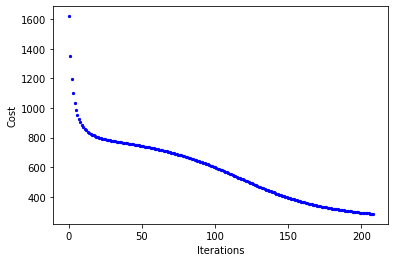

In [26]:
draw_cost_changes(J_hist) 
pred = multiply_3d(T, M, U)
pred_rescaled= pred
# pred_rescaled = (pred + Ymean) * scale / scale_coef
df_pred= pd.DataFrame(pred_rescaled[0,:,:], index= df_target.index, columns = df_target.columns)
df_pred_alt= pd.DataFrame(pred_rescaled[1,:,:], index= df_target.index, columns = df_target.columns)
df_pred= df_pred.applymap(round)
df_pred_alt= df_pred_alt.applymap(lambda x: '{:.2f}'.format(x))

In [27]:
df_pred

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,3,3,1,3,2,2,2,2,1,5,5,2,2,0
1,-1,1,2,1,1,2,1,-1,1,2,3,3,1,1
2,-1,2,1,1,1,1,1,0,1,4,2,4,1,1
3,3,4,1,3,4,1,1,1,2,5,3,1,1,1
4,-1,1,1,2,0,2,2,-1,0,2,3,4,2,1
5,3,3,2,2,4,4,2,1,2,4,3,2,-1,1
6,1,2,2,1,3,3,1,0,1,2,0,2,-1,1
7,0,3,1,3,2,2,2,0,3,4,4,5,1,1
8,1,2,2,2,3,2,2,1,2,4,3,3,0,0
9,2,3,3,2,3,4,2,1,1,4,4,3,0,1


In [28]:
df_pred_alt

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,0.58,0.77,0.11,0.70,0.55,0.29,0.42,0.33,0.45,1.05,1.05,0.50,0.42,0.03
1,-0.20,0.25,0.38,0.29,0.16,0.29,0.24,-0.04,0.29,0.52,0.45,0.69,0.31,0.07
2,-0.12,0.36,0.17,0.27,0.21,0.36,0.39,0.05,0.17,0.62,0.50,0.74,0.17,0.01
3,0.70,0.54,0.35,0.54,0.57,0.26,0.16,0.25,0.22,0.82,0.77,0.13,0.23,0.06
4,-0.14,0.34,0.25,0.36,0.23,0.21,0.26,-0.10,0.12,0.60,0.57,0.76,0.34,0.23
5,0.62,0.66,0.36,0.39,0.70,0.75,0.46,0.28,0.36,0.83,0.65,0.44,-0.24,0.14
6,0.20,0.25,0.46,0.09,0.42,0.56,0.15,0.09,0.18,0.42,0.13,0.25,-0.24,0.07
7,0.06,0.52,0.24,0.48,0.32,0.49,0.58,0.08,0.29,0.75,0.91,0.88,0.20,0.02
8,0.19,0.45,0.37,0.37,0.48,0.49,0.37,0.11,0.32,0.75,0.60,0.55,0.03,0.08
9,0.40,0.64,0.49,0.47,0.65,0.63,0.39,0.16,0.37,0.94,0.70,0.67,0.04,0.26


In [32]:
# def evaluate(df, df_pred):
#     print ((np.sum((df-df_pred).values**2))/df.size)
#     return df-df_pred
evaluate(df, df_pred)

3.6142857142857143


,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,2,2,4,-2,-1,-1,-1,-1,0,0,0,3,0,2
1,6,4,3,0,0,-1,0,2,0,3,2,2,1,1
2,6,3,4,0,0,0,0,1,0,1,3,1,1,1
3,0,-1,2,2,1,4,0,0,-1,0,2,4,0,0
4,4,2,2,3,5,3,-1,2,1,3,2,1,-1,0
5,0,0,1,3,1,1,-1,0,-1,1,2,3,2,0
6,0,-1,-1,2,0,0,4,5,4,3,5,3,2,0
7,1,-2,0,0,1,1,3,5,2,1,1,0,0,0
8,0,-1,-1,1,0,1,3,4,3,1,2,2,1,1
9,2,1,1,2,1,0,0,1,1,0,0,1,1,0


In [33]:
df_pred_alt= pd.DataFrame(pred_rescaled[1,:,:], index= df_target.index, columns = df_target.columns)
evaluate(df_alt*5, df_pred_alt*5)

7.693357036902471


,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,3.182337,2.750808,5.701887,-2.438176,-1.524986,-0.170538,-1.023715,-0.607953,-0.830178,2.301471,1.151429,3.194510,0.057901,2.504706
1,6.955000,4.845907,3.295684,-0.199120,0.509358,-0.343275,-0.029812,1.345696,-0.084419,3.504700,4.673525,2.367815,1.328097,2.967238
2,8.162952,3.411284,5.394536,-0.012172,0.522642,-0.446816,-0.610475,1.330616,0.260145,2.312909,4.830608,3.076183,2.386116,2.630537
3,0.139800,0.351749,1.650351,4.852319,4.316469,4.144927,0.401355,-0.201415,0.032206,1.854387,2.254121,6.708045,-0.017015,0.740511
4,4.856464,2.239934,2.432130,6.014757,4.677487,6.098339,-0.100344,1.587155,0.710049,5.079239,3.581499,2.789413,-0.699240,0.143006
5,0.014431,-0.032376,2.148625,4.474194,4.077425,2.042981,-0.621057,-0.135650,-0.706458,3.440742,2.059496,4.400328,2.822318,0.815003
6,0.323396,-0.047634,-1.085877,4.365443,2.583953,1.494693,6.620955,6.927148,5.506371,4.836678,6.087355,7.072853,2.674488,0.945210
7,1.280434,-1.303576,-0.108210,1.788618,2.068654,0.678737,3.186122,7.401222,4.526948,1.461703,0.871988,2.527366,0.022288,1.136612
8,0.626092,-1.204551,-0.344273,2.695990,1.373473,2.106061,3.467211,7.272482,4.355567,3.592120,2.435179,3.489620,0.919751,1.095504
9,2.169046,2.515588,3.254674,2.923902,0.836156,0.918840,0.200209,2.432064,1.204092,0.564738,2.970041,1.897584,1.321063,-0.234031


In [34]:
df_alt

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,1.219512,1.315789,1.250000,0.208333,0.243902,0.256410,0.212766,0.208333,0.285714,1.515152,1.282051,1.136364,0.434783,0.526316
1,1.190476,1.219512,1.041667,0.250000,0.263158,0.217391,0.238095,0.227273,0.277778,1.219512,1.388889,1.162791,0.571429,0.666667
2,1.515152,1.041667,1.250000,0.270270,0.312500,0.270270,0.270270,0.312500,0.222222,1.086957,1.470588,1.351351,0.645161,0.540541
3,0.731707,0.612245,0.681818,1.515152,1.428571,1.086957,0.238095,0.208333,0.227273,1.190476,1.219512,1.470588,0.222222,0.212766
4,0.833333,0.789474,0.731707,1.562500,1.162791,1.428571,0.243902,0.222222,0.263158,1.612903,1.282051,1.315789,0.204082,0.263158
5,0.625000,0.652174,0.789474,1.282051,1.515152,1.162791,0.333333,0.256410,0.217391,1.515152,1.063830,1.315789,0.322581,0.303030
6,0.263158,0.243902,0.243902,0.967742,0.937500,0.857143,1.470588,1.470588,1.282051,1.388889,1.351351,1.666667,0.294118,0.263158
7,0.312500,0.263158,0.222222,0.833333,0.731707,0.625000,1.219512,1.562500,1.190476,1.041667,1.086957,1.388889,0.208333,0.250000
8,0.312500,0.212766,0.303030,0.909091,0.750000,0.909091,1.063830,1.562500,1.190476,1.470588,1.086957,1.250000,0.212766,0.303030
9,0.833333,1.142857,1.142857,1.052632,0.816327,0.816327,0.425532,0.645161,0.606061,1.052632,1.290323,1.052632,0.303030,0.212766


## Rescale scaling/normalization 



In [195]:

def normalize_Y_3d(Y,R,scale_coef = 10 ):
    '''
    normalize along axis 1 - separately for every moview 
    '''
    assert isinstance(Y, np.ndarray) # make sure its np array - wrong results for pd.DataFrame
    assert isinstance(R, np.ndarray)
        
    assert len(Y.shape)==3    
    assert len(R.shape)==3

    scale = np.zeros(nt)
    Y_scaled = np.zeros(shape= Y.shape)
    nm = Y.shape[1] 

    Ymean = np.zeros(shape= (nt,nm, 1))
    Ynorm = np.zeros(shape= Y.shape)

    for t in range (nt):
        scale[t] = Y[t][R[t] == 1].max() - Y[t][R[t] == 1].min()


        Y_scaled[t] = Y[t] / scale[t] * scale_coef # make it more contrast
        for i in range(nm):
            idx = R[t,i,:] == 1
            if idx.sum()==0:
                Ymean[t,i]= 0     
            else: 
                Ymean[t,i] = Y_scaled[t, i, idx].mean()
            Ynorm[t, i, idx]= Y_scaled[t, i, idx] - Ymean[t, i]            
    return Ymean, Ynorm, scale


# Ymean, Ynorm, scale = normalize_Y(Y, R, scale_coef = scale_coef)
scale_coef = 10
Ymean, Ynorm, scale = normalize_Y_3d(Y_3d, R_3d, scale_coef = 10 )
Ynorm.shape

(2, 15, 14)

In [194]:
R = R_3d
idx = R[0,0,:] == 1
idx.sum()


0

In [161]:
step_display = 20
eps=.05
n_features=30
max_iter= 10000 
verbose= 1
lr = 0.001

T, M, U, J_hist = fit_3d(Ynorm, R_3d, nf=n_features, alpha=lr, lambd=1, max_iter=max_iter,
                           eps=eps, step=step_display, verbose=verbose)

num_types= 2, num_movies= 15, num_users= 14
Running gradient descent with alpha= 0.001, lambda= 1, eps= 0.05, max_iter= 10000
20: 1278.3952513060053
40: 920.9423662953907
60: 672.7303469157982
80: 545.4315702886806
100: 479.6632821807278
120: 440.10311035631685
140: 411.78761292527565
160: 388.8901729067274
180: 369.2980326399296
200: 352.18220809241586
220: 337.09072677978736
240: 323.67896519238855
260: 311.65449604491596
280: 300.77409938922756
300: 290.8445237057889
320: 281.71819218518203
340: 273.28527575625765
360: 265.46466809067397
380: 258.19553205473835
400: 251.4302429094211
420: 245.12904981705174
440: 239.2564880930033
460: 233.77936238580742
480: 228.66595159714302
500: 223.88599578236705
520: 219.41104263143302
540: 215.2148371207214
560: 211.27357802835516
580: 207.5659866107426
600: 204.07320947541226
620: 200.77860988733198
640: 197.66750370300178
660: 194.72688365373597
680: 191.94515991883492
700: 189.31193144381842
720: 186.81779297931502
740: 184.4541770653066
76

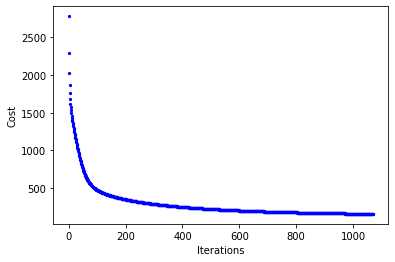

In [162]:
draw_cost_changes(J_hist) 

In [165]:
def rescale_3d(pred, Ymean, R,scale,scale_coef):
    pred_rescaled = np.zeros(shape= pred.shape)
    pred_with_mean = (pred + Ymean)
    for t in range (nt):
        pred_rescaled[t] = pred_with_mean[t] * scale[t] / scale_coef # make it more contrast
    return pred_rescaled
    

pred = multiply_3d(T, M, U)
pred_rescaled = rescale_3d(pred, Ymean, R,scale,scale_coef)

df_pred = pd.DataFrame(pred_rescaled[0], index= df_target.index, columns = df_target.columns)
evaluate(df, df_pred)    
df_pred= df_pred.applymap(round)

df_pred_alt= pd.DataFrame(pred_rescaled[1], index= df_target.index, columns = df_target.columns)
evaluate(df_alt*5, df_pred_alt*5)
df_pred_alt= df_pred_alt.applymap(lambda x: '{:.2f}'.format(x))


df_pred

0.8144020689799263
2.3061085799454375


,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,5,5,3,1,1,3,1,3,1,5,5,5,3,3
1,3,3,5,1,3,1,1,3,1,3,5,5,2,3
2,2,5,2,1,1,2,1,1,1,5,2,5,2,2
3,3,3,3,5,5,3,1,1,1,5,5,3,1,1
4,3,3,3,5,3,3,3,1,3,3,5,5,1,3
5,3,3,3,3,5,5,1,1,3,5,5,3,1,1
6,1,1,1,3,3,3,3,5,5,5,3,5,3,1
7,1,1,3,3,3,3,5,3,5,5,5,5,1,1
8,1,3,1,3,3,3,5,5,5,5,3,5,1,3
9,4,4,4,4,4,4,4,4,3,4,4,4,4,1


In [166]:
df_pred_alt

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,0.56,1.26,0.57,0.20,0.55,0.28,0.21,0.24,0.28,1.48,0.58,0.59,0.56,0.55
1,0.43,0.48,0.41,0.27,0.28,0.21,0.23,0.41,0.30,1.18,0.44,0.43,0.58,0.43
2,1.47,1.05,0.96,0.30,0.95,0.32,0.93,0.96,0.95,1.09,1.45,1.32,0.65,0.97
3,0.65,0.64,0.68,0.66,1.38,0.64,0.23,0.21,0.24,0.66,0.67,1.44,0.23,0.62
4,0.80,0.79,0.75,1.56,0.81,1.39,0.79,0.26,0.31,0.80,1.26,1.29,0.21,0.28
5,0.92,0.67,0.79,1.26,1.51,1.17,0.35,0.28,0.91,1.50,1.07,1.30,0.90,0.32
6,0.28,0.25,0.60,0.92,0.66,0.67,0.67,1.43,0.63,0.66,0.66,0.64,0.61,0.30
7,0.31,0.27,0.24,0.66,0.65,0.66,1.18,0.66,1.18,0.66,1.07,0.67,0.64,0.26
8,0.32,0.83,0.32,0.84,0.76,0.82,1.05,1.53,0.86,1.44,1.08,1.26,0.23,0.31
9,0.84,1.12,1.12,1.05,0.85,0.85,0.82,0.66,0.62,1.04,0.87,1.04,0.35,0.85


```
nf = 10
lr = 0.005
eps = 1 
    0.724035810128615
    2.067268738341518
    


nf = 20
    0.8070133238598044
    2.3281637344891246
    
nf = 30
    0.8144020689799263
    2.3061085799454375


eps=.0005
lr = 0.0005
nf=20
    0.8154335642058155
    3.064650405677528
```    

## Test on real  use case 

No rates (MSV) for some topic (phrase) for any users (locodes)<br>
one row is empty in one layer 


In [167]:
df_target = df.copy()
df_target.iloc[0]=0
df_target

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,5,5,1,1,1,1,1,1,5,5,5,2,2
2,5,5,5,1,1,1,1,1,1,5,5,5,2,2
3,3,3,3,5,5,5,1,1,1,5,5,5,1,1
4,3,3,3,5,5,5,1,1,1,5,5,5,1,1
5,3,3,3,5,5,5,1,1,1,5,5,5,1,1
6,1,1,1,3,3,3,5,5,5,5,5,5,1,1
7,1,1,1,3,3,3,5,5,5,5,5,5,1,1
8,1,1,1,3,3,3,5,5,5,5,5,5,1,1
9,4,4,4,4,4,4,2,2,2,4,4,4,1,1


In [168]:
coef_layer = np.random.randint(30, 50, size= df.shape)/10
coef_layer
df_alt = df/coef_layer
df_alt

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,1.562500,1.666667,1.020408,0.204082,0.303030,0.256410,0.303030,0.312500,0.243902,1.162791,1.666667,1.315789,0.625000,0.500000
1,1.315789,1.562500,1.470588,0.270270,0.212766,0.222222,0.222222,0.238095,0.322581,1.612903,1.388889,1.666667,0.606061,0.526316
2,1.063830,1.020408,1.388889,0.303030,0.208333,0.322581,0.256410,0.263158,0.250000,1.388889,1.351351,1.388889,0.571429,0.526316
3,0.833333,0.697674,0.769231,1.666667,1.515152,1.515152,0.312500,0.333333,0.243902,1.020408,1.162791,1.136364,0.256410,0.212766
4,0.810811,1.000000,0.882353,1.315789,1.250000,1.282051,0.227273,0.303030,0.285714,1.388889,1.086957,1.282051,0.256410,0.277778
5,0.967742,0.882353,0.810811,1.111111,1.190476,1.250000,0.263158,0.285714,0.277778,1.515152,1.086957,1.612903,0.263158,0.238095
6,0.238095,0.204082,0.204082,0.638298,0.666667,0.967742,1.470588,1.190476,1.041667,1.250000,1.666667,1.351351,0.270270,0.303030
7,0.217391,0.285714,0.256410,1.000000,0.750000,0.909091,1.428571,1.041667,1.020408,1.428571,1.111111,1.428571,0.263158,0.303030
8,0.232558,0.256410,0.250000,0.857143,0.750000,1.000000,1.351351,1.351351,1.219512,1.219512,1.250000,1.063830,0.217391,0.227273
9,0.930233,0.888889,1.052632,0.975610,1.111111,1.081081,0.444444,0.425532,0.540541,0.909091,1.000000,0.930233,0.294118,0.270270


In [212]:
nm, nu = df.shape 
nt= 2
Y_3d = np.zeros(shape= (nt, nm, nu ))
Y_3d[0,:,:] = df_target.copy().values
Y_3d[1,:,:] = df_alt.copy().values
Y_3d


R_3d= vf(Y_3d)
R_3d

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1

num_types= 2, num_movies= 15, num_users= 14
Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.0005, max_iter= 10000
20: 1934.7629191645342
40: 1312.589200179366
60: 1009.3169534278844
80: 798.570521150978
100: 637.5372212513962
120: 528.2783309901062
140: 459.44222571691216
160: 416.6690387635442
180: 389.1826386882769
200: 370.39299613893564
220: 356.58701522956665
240: 345.70891924207456
260: 336.6033249555361
280: 328.60165444546914
300: 321.3039407933922
320: 314.4632330600193
340: 307.9231166502146
360: 301.5831376687546
380: 295.37925765085515
400: 289.2725815642029
420: 283.2426574369669
440: 277.2832188772243
460: 271.3991020608288
480: 265.60359236158627
500: 259.9158206775659
520: 254.35810653444844
540: 248.9533462695585
560: 243.7226579660954
580: 238.68351227514768
600: 233.84851284418124
620: 229.2248767548433
640: 224.8145481807754
660: 220.6147932449564
680: 216.61908734428934
700: 212.81811480663617
720: 209.20073914722843
740: 205.754852075462
760: 202.46

6760: 85.71443646859912
6780: 85.69715247377148
6800: 85.68002120039847
6820: 85.66304135353042
6840: 85.64621164996558
6860: 85.62953081797384
6880: 85.61299759703176
6900: 85.59661073756868
6920: 85.58036900072325
6940: 85.56427115811036
6960: 85.5483159915977
6980: 85.53250229309188
7000: 85.5168288643337
7020: 85.50129451670215
7040: 85.48589807102678
7060: 85.47063835740838
7080: 85.45551421504703
7100: 85.44052449207805
7120: 85.42566804541467
7140: 85.4109437405977
7160: 85.39635045165167
7180: 85.38188706094729
7200: 85.36755245906951
7220: 85.35334554469159
7240: 85.3392652244543
7260: 85.32531041285034
7280: 85.31148003211354
7300: 85.29777301211266
7320: 85.2841882902496
7340: 85.27072481136175
7360: 85.25738152762807
7380: 85.24415739847913
7400: 85.23105139051042
7420: 85.21806247739897
7440: 85.20518963982323
7460: 85.19243186538563
7480: 85.179788148538
7500: 85.16725749050968
7520: 85.15483889923775
7540: 85.14253138929978
7560: 85.13033398184865
7580: 85.11824570454931

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,5,5,1,1,1,1,1,1,5,5,5,2,2
2,5,5,5,1,1,1,1,1,1,5,5,5,2,2
3,3,3,3,5,5,5,1,1,1,5,5,5,1,1
4,3,3,3,5,5,5,1,1,1,5,5,5,1,1
5,3,3,3,5,5,5,1,1,1,5,5,5,1,1
6,1,1,1,3,3,3,5,5,5,5,5,5,1,1
7,1,1,1,3,3,3,5,5,5,5,5,5,1,1
8,1,1,1,3,3,3,5,5,5,5,5,5,1,1
9,4,4,4,4,4,4,2,2,2,4,4,4,1,1


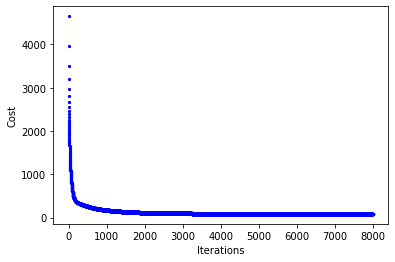

In [225]:
step_display = 20
eps=.0005
n_features=20
max_iter= 10000 
verbose= 1
lr = 0.0005

T, M, U, J_hist = fit_3d(Ynorm, R_3d, nf=n_features, alpha=lr, lambd=1, max_iter=max_iter,
                           eps=eps, step=step_display, verbose=verbose)
draw_cost_changes(J_hist) 

pred = multiply_3d(T, M, U)
pred_rescaled = rescale_3d(pred, Ymean, R,scale,scale_coef)

df_pred = pd.DataFrame(pred_rescaled[0], index= df_target.index, columns = df_target.columns)
evaluate(df, df_pred)    
df_pred= df_pred.applymap(round)

df_pred_alt= pd.DataFrame(pred_rescaled[1], index= df_target.index, columns = df_target.columns)
evaluate(df_alt*5, df_pred_alt*5)
df_pred_alt= df_pred_alt.applymap(lambda x: '{:.2f}'.format(x))

df_pred

In [226]:
df_pred.iloc[0]

u0     0
u1     0
u2     0
u3     0
u4     0
u5     0
u6     0
u7     0
u8     0
u9     0
u10    0
u11    0
u12    0
u13    0
Name: 0, dtype: int64

In [227]:
df - df_pred

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,5,5,5,1,1,1,1,1,1,5,5,5,2,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3d Altogether

In [187]:
Y_3d[0],Y_3d[1] 

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 5., 5., 1., 1., 1., 1., 1., 1., 5., 5., 5., 2., 2.],
        [5., 5., 5., 1., 1., 1., 1., 1., 1., 5., 5., 5., 2., 2.],
        [3., 3., 3., 5., 5., 5., 1., 1., 1., 5., 5., 5., 1., 1.],
        [3., 3., 3., 5., 5., 5., 1., 1., 1., 5., 5., 5., 1., 1.],
        [3., 3., 3., 5., 5., 5., 1., 1., 1., 5., 5., 5., 1., 1.],
        [1., 1., 1., 3., 3., 3., 5., 5., 5., 5., 5., 5., 1., 1.],
        [1., 1., 1., 3., 3., 3., 5., 5., 5., 5., 5., 5., 1., 1.],
        [1., 1., 1., 3., 3., 3., 5., 5., 5., 5., 5., 5., 1., 1.],
        [4., 4., 4., 4., 4., 4., 2., 2., 2., 4., 4., 4., 1., 1.],
        [4., 4., 4., 4., 4., 4., 2., 2., 2., 4., 4., 4., 1., 1.],
        [4., 4., 4., 4., 4., 4., 2., 2., 2., 4., 4., 4., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 array([

In [216]:
R_3d= vf(Y_3d)
R_3d

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1

num_types= 2, num_movies= 15, num_users= 14
Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.0005, max_iter= 10000
20: 2216.8167258126086
40: 2042.9151495632987
60: 1680.492769337277
80: 1111.1121088934358
100: 730.4561083140168
120: 615.0948225352058
140: 584.2899415348905
160: 571.6623414069554
180: 562.6980080255615
200: 553.6535106833328
220: 542.8770852792069
240: 528.8945350802796
260: 509.77189713253534
280: 482.81683444787717
300: 444.90778017452465
320: 394.69323085439987
340: 337.1711768275476
360: 284.67213825990336
380: 247.2570063935255
400: 225.01462199052207
420: 212.64829668996992
440: 205.42978212658883
460: 200.6108098556684
480: 196.8356727431212
500: 193.48011152776036
520: 190.26737930436605
540: 187.07977002956403
560: 183.87125978098763
580: 180.62809954898475
600: 177.3515343409053
620: 174.05053267376297
640: 170.73882213026454
660: 167.43352002291962
680: 164.1541091200772
700: 160.92128136133115
720: 157.7556043052338
740: 154.67618136996208
760

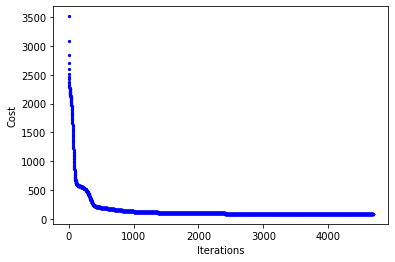

In [221]:

def run_cofi_3d(Y_3d):
    # mark provided and missed values     
    R_3d= vf(Y_3d)
    # normalize Y for every layer
    Ymean, Ynorm, scale = normalize_Y_3d(Y_3d, R_3d, scale_coef = 10)
    # train model (run gradient descent)
    T, M, U, J_hist = fit_3d(Ynorm, R_3d, nf=n_features, alpha=lr, lambd=1, max_iter=max_iter,
                               eps=eps, step=step_display, verbose=verbose)
    # visualize convergence     
    draw_cost_changes(J_hist) 
    
    # compute prediction 
    pred = multiply_3d(T, M, U)
    
    # rescale predisction     
    pred_rescaled = rescale_3d(pred, Ymean, R,scale,scale_coef)

    # convert to dataframes and evaluate
    df_pred = pd.DataFrame(pred_rescaled[0], index= df_target.index, columns = df_target.columns)
    evaluate(df, df_pred)    
    df_pred= df_pred.applymap(round)

    df_pred_alt= pd.DataFrame(pred_rescaled[1], index= df_target.index, columns = df_target.columns)
    evaluate(df_alt*5, df_pred_alt*5)
    df_pred_alt= df_pred_alt.applymap(lambda x: '{:.2f}'.format(x))

    return df_pred, df_pred_alt, T, M, U,Ymean, Ynorm, scale 


# step_display = 50
# eps=.005
# n_features=10
# max_iter= 3000 
# verbose= 1
# lr = 0.001
step_display = 20
eps=.0005
n_features=10
max_iter= 10000 
verbose= 1
lr = 0.0005

df_pred, df_pred_alt, T, M, U,Ymean, Ynorm, scale = run_cofi_3d(Y_3d)


In [224]:
df_pred

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,5,5,1,1,1,1,1,1,5,5,5,2,2
2,5,5,5,1,1,1,1,1,1,5,5,5,2,2
3,3,3,3,5,5,5,1,1,1,5,5,5,1,1
4,3,3,3,5,5,5,1,1,1,5,5,5,1,1
5,3,3,3,5,5,5,1,1,1,5,5,5,1,1
6,1,1,1,3,3,3,5,5,5,5,5,5,1,1
7,1,1,1,3,3,3,5,5,5,5,5,5,1,1
8,1,1,1,3,3,3,5,5,5,5,5,5,1,1
9,4,4,4,4,4,4,2,2,2,4,4,4,1,1


In [223]:
pred_rescaled = rescale_3d(pred, Ymean, R,scale,scale_coef)
pred_rescaled

array([[[-4.80848885e-03, -5.45953713e-02,  2.01245533e-01,
         -1.26274096e-02, -1.43963175e-02,  2.16250936e-02,
         -5.22690542e-02, -5.88882872e-02, -6.14951048e-02,
          6.63091367e-02,  3.77228967e-03,  7.87287069e-03,
         -3.31070437e-02, -8.55121318e-03],
        [ 4.88058377e+00,  4.93763709e+00,  5.09538978e+00,
          1.09852601e+00,  9.73115734e-01,  1.04354062e+00,
          9.91582066e-01,  1.03652521e+00,  1.02016435e+00,
          4.98815090e+00,  4.99035912e+00,  4.98325520e+00,
          2.01510015e+00,  1.94991553e+00],
        [ 4.90566070e+00,  4.99454620e+00,  5.03486681e+00,
          1.10694616e+00,  9.84263424e-01,  1.00758379e+00,
          9.35360159e-01,  1.02237592e+00,  1.01975577e+00,
          5.00068281e+00,  4.97259932e+00,  5.00472476e+00,
          2.04575514e+00,  1.96817350e+00],
        [ 3.05306944e+00,  3.02730005e+00,  3.05183234e+00,
          4.97013147e+00,  5.03986458e+00,  5.07421539e+00,
          9.54629006e-01,  1

In [205]:
M

array([[ 3.66724474e-02, -1.99243672e-02,  5.34745709e-02,
         5.51086493e-02,  2.17430254e-03, -1.32701783e+00,
        -1.07892455e+00,  8.83507517e-02,  1.83304256e+00,
         1.33883803e-01],
       [-3.66867589e-01,  2.05706805e-01,  4.15459374e-02,
         3.94328113e-01,  4.21824191e-01,  2.36579572e-01,
         1.10929491e-01,  1.06609884e+00,  6.72598597e-01,
         1.85185749e+00],
       [-4.35647514e-01,  1.57573396e-01, -9.56935489e-02,
         3.85344897e-01,  5.56309123e-02, -1.84116102e-02,
         7.63244677e-01,  1.04849464e+00,  1.03949410e-01,
         1.81402107e+00],
       [-3.45202540e-01,  9.16091158e-02,  3.27596120e-01,
        -2.35061844e-01, -5.54209912e-01,  1.33743753e-01,
        -3.38839575e-01,  1.59777212e+00, -7.10272194e-01,
        -8.17051552e-01],
       [-3.61290111e-01, -2.26741585e-01,  1.28628382e-02,
        -2.29516737e-01,  3.33979180e-01,  4.00365653e-01,
        -3.01856983e-01,  1.55211043e+00,  6.13553029e-02,
        -7.

In [206]:
U

array([[-0.62199428,  0.07679842, -0.02834863, -1.10177964, -0.17376496,
         0.45404063,  0.99135329, -0.47781521,  0.47838787,  0.65319159],
       [-0.54040228, -0.13326349, -0.13228698, -1.09291816,  0.18290992,
         0.24306763,  1.03767791, -0.45908898,  0.78960073,  0.69877007],
       [-0.68637575, -0.02159075,  0.26933585, -1.10760239,  0.42452327,
         0.13875305,  0.00924469, -0.50526656,  0.1534604 ,  0.7731597 ],
       [-0.26055608,  0.19362796,  0.15404585,  0.08951099, -0.5269346 ,
        -0.55444946,  0.03822993, -0.52763294, -0.68403646, -1.34638435],
       [-0.4015808 , -0.27230509,  0.07893831,  0.0429991 ,  0.16126371,
        -0.14158853, -0.04947421, -0.53096711, -0.70149533, -1.39154584],
       [-0.33045238, -0.40183453, -0.33899025,  0.13444154, -0.56247604,
        -0.11529188, -0.46722723, -0.55236103, -0.59215951, -1.36012457],
       [-0.21451929, -0.25529682, -0.43933218,  1.01022368, -0.47331646,
        -0.30680875, -0.56519546,  1.29280874

In [207]:
R_3d

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1

### test run J_derivative_3d

In [412]:

T = np.random.randn(nt, n_features)
M = np.random.randn(nm, n_features)
U = np.random.randn(nu,n_features)
nf= 20 
lambd=1
temp = J_derivative_3d(Y_3d, R_3d, T, M, U, nt, nm, nu, nf, lambd)

temp[0].shape,temp[1].shape,temp[2].shape

((2, 20), (15, 20), (14, 20))

### test run multiply_3d

In [414]:
T = np.random.randn(nt, n_features)
M = np.random.randn(nm, n_features)
U = np.random.randn(nu,n_features)


W= multiply_3d(T, M, U)
W

nt=2, nm=15, nu=14, nf=20


array([[[-2.37778456e+00, -6.68572355e+00,  9.79264063e-01,
         -1.87932312e+00, -3.46878067e+00, -1.09131628e+01,
         -2.89499400e+00,  5.04940641e+00, -2.90001250e+00,
          1.75187215e-01,  1.32453071e+00, -3.14214429e+00,
          1.33209706e+01, -1.58161180e+00],
        [-4.47859127e+00,  2.87532829e+00, -9.29425417e-01,
         -2.44149292e+00,  6.99949707e+00, -2.56532853e-01,
         -2.18177059e+00,  9.90882885e+00,  2.56198738e+00,
          2.28618531e+00, -7.40624865e-03,  4.64863955e+00,
         -8.77057831e+00,  5.01148262e-01],
        [ 3.00643986e+00, -2.34046142e+00, -9.14317011e-02,
          5.64158755e-01, -5.47098798e+00,  5.32529010e+00,
          3.92093218e+00, -6.83437991e+00, -5.18726828e+00,
          3.16381613e+00,  2.08679714e+00,  1.76489630e+00,
         -2.41068395e+00, -2.11390289e-01],
        [-4.74381645e+00,  4.52624054e+00, -3.09581664e+00,
          3.73440554e+00, -1.98116825e+00, -6.16288184e+00,
         -3.42043519e+00, -1

### test run J_3d

In [416]:
J_3d(Y_3d, R_3d, T, M, U, lambd)

nt=2, nm=15, nu=14, nf=20


2684.3259294846534

In [384]:
W.shape

(2, 15, 14)

In [369]:
T.shape, M.shape, U.shape


((2, 20), (15, 20), (14, 20))

In [ ]:
    Ymean, Ynorm, scale = normalize_Y(Y, R)
    X, Theta, J_hist = fit(Ynorm, R, num_features=n_features, alpha=lr, lambd=1, max_iter=max_iter,
                           eps=eps, step=step_display, verbose=verbose)

    draw_cost_changes(J_hist) 
    pred = X @ Theta
    pred_rescaled = (pred + Ymean) * scale / scale_coef
    df_pred= pd.DataFrame(pred_rescaled, index= df_target.index, columns = df_target.columns)
    df_pred= df_pred.applymap(round)
    return df_pred

n_features=20
max_iter= 10000 
verbose= 1
lr = 0.0005
eps= .0001 

df_pred = fill_matrix(df_target, 
            n_features= n_features, 
            max_iter= max_iter,
            verbose= verbose,
            lr =lr,
            eps= eps,
            step_display=50 )
df_pred

In [ ]:
n_features= 5 
max_iter= 1000 
verbose= False
fit_collaborative_filtering(Y, R, n_features=n_features, max_iter=max_iter, verbose=verbose, return_J_hist= True)

In [ ]:
def fill_missed(n_features=20, max_iter=5000, verbose=1, return_J_hist= True):
    df_pred, J_hist = fit_target(df_target, index, columns, values, n_features=n_features, max_iter=max_iter, verbose=verbose)

    existing_unique_values = np.array(sorted(df_input[values].unique()))
    df_pred['{}_pred_round'.format(values)]= df_pred['{}_pred'.format(values)].apply(lambda x: round_to_existing(x,existing_unique_values))
    df_pred[index]=df_pred[index].astype(df_input.dtypes[index])
    df_pred[columns] = df_pred[columns].astype(df_input.dtypes[columns])
    df_pred= df_pred.merge(df_input, how='outer', on = ([index, columns]))
    df_pred= df_pred[[index,columns, values, '{}_pred_round'.format(values), '{}_pred'.format(values)]]

    if df_missed is None:
        df_out= df_pred
    else:
        df_out = df_missed.merge(df_pred, how= 'left', on= ([index, columns]))

    if return_J_hist:
        return df_out, J_hist
    else:
        return df_out


In [ ]:
def fit_target(df_target, index, columns, values, n_features=20, max_iter=5000, verbose=1):
    Y= df_target.fillna(0) # not sure it is necessary
    R= df_target.applymap(lambda x: 0 if np.isnan(x) else 1)

    df_results_pivot, J_hist = fit_collaborative_filtering(Y, R, n_features=n_features, max_iter=max_iter, verbose=verbose, return_J_hist= True)

    df_results_pivot_temp= pd.DataFrame(df_results_pivot.to_records())
    df_results = pd.melt(df_results_pivot_temp,
                id_vars=index, # 'iid',
                value_vars=list(df_results_pivot_temp.columns[1:]),
                var_name= columns,# 'uid',
                value_name= '{}_pred'.format(values)) # 'rating_pred')
    return df_results,  J_hist



In [ ]:

def fit_collaborative_filtering(Y, R, n_features=20, max_iter=50000, verbose=1, return_J_hist= False):
    '''
        Y: df of provided values
        R: df of 0 and 1 - marked values as provided (e.g. R is 1 for elements of Y that are not 0)
    '''

    scale = Y.max() - Y.min()
    Y_scaled = Y / scale * 10
    n_0 = Y_scaled.shape[0]
    Ymean, Ynorm = normalize_Y(Y_scaled.values, R.values, n_0)
    X, Theta, J_hist = fit(Ynorm, R.values, num_features=n_features, alpha=0.0005, lambd=1, max_iter=max_iter,
                           eps=.01, step=50, verbose=verbose)
    # if verbose:
    #     draw_cost_changes(J_hist)

    pred = X @ Theta
    pred_rescaled = (pred + Ymean) * scale.values / 10

    df_results_pivot= pd.DataFrame(pred_rescaled , index= Y.index, columns = Y.columns)

    if return_J_hist:
        return df_results_pivot, J_hist
    else:
        return df_results_pivot

In [ ]:
def fit(Y, R, num_features=10, alpha=0.0001, lambd=.01, eps=.1, max_iter=1000, step=100, verbose=0):
    num_movies, num_users = Y.shape

    if verbose:
        print('Running gradient descent with alpha= {}, lambda= {}, eps= {}, max_iter= {}'.format(
            alpha, lambd, eps, max_iter))

    #     X= params[:num_movies*num_features].reshape(num_movies,num_features)
    #     Theta = params[num_movies*num_features:].reshape(num_features,num_users)

    np.random.seed(2019)
    X = np.random.randn(num_movies, num_features)
    Theta = np.random.randn(num_features, num_users)

    J_hist = [-1]  # used for keeping J values. Init with -1 to avoid 0 at first iter
    continue_iter = True  # flag to continue next iter (grad desc step)
    iter_number = 0  # used for limit by max_iter

    try:
        while continue_iter:
            # Do step of gradient descent
            X_grad, Theta_grad = J_derivative(Y, R, X, Theta, num_movies, num_users, num_features, lambd)
            X = X - alpha * X_grad
            Theta = Theta - alpha * Theta_grad

            # keep history of J values
            J_hist.append(J(Y, R, X, Theta, lambd))
            # check criteria of exit (finish grad desc)
            if iter_number > max_iter:  # if limit succeeded
                continue_iter = False
                print('iter_number> max_iter')
            elif np.abs(J_hist[iter_number - 1] - J_hist[iter_number]) < eps:  # if accuracy is succeeded
                continue_iter = False
                print('J_hist[iter_number]={}'.format(J_hist[iter_number]))
            iter_number += 1

            if verbose and iter_number % step == 0:
                print('{}: {}'.format(iter_number, J_hist[iter_number - 1]))
        return X, Theta, J_hist
    except Exception as e:
        print('Training is interrupted due to error:', e)
        return X, Theta, J_hist